In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./data/dax-data.csv")

In [3]:
useful = df[["high", "low", "daydir"]].copy()

In [4]:
def get_lags(df, c, n):
    for i in range(1, n+1):
        df[c + "_lag_" + str(i)] = df[c].shift(i)

In [5]:
get_lags(useful, "high", 2)
get_lags(useful, "low", 2)
useful.dropna()

,high,low,daydir,high_lag_1,high_lag_2,low_lag_1,low_lag_2
2,14402.92,13977.13,up,14068.03,14095.81,13868.20,13959.27
3,14475.65,14309.35,up,14402.92,14068.03,13977.13,13868.20
4,14560.97,14408.52,up,14475.65,14402.92,14309.35,13977.13
5,14595.02,14515.07,up,14560.97,14475.65,14408.52,14309.35
6,14527.42,14450.72,up,14595.02,14560.97,14515.07,14408.52
...,...,...,...,...,...,...,...
271,14627.58,14371.90,up,14428.03,14375.82,14247.38,14187.82
272,14925.25,14553.71,up,14627.58,14428.03,14371.90,14247.38
273,14744.72,14555.87,down,14925.25,14627.58,14553.71,14371.90
274,14732.00,14404.03,down,14744.72,14925.25,14555.87,14553.71


In [6]:
useful["swing"] = 0
useful["trend"] = 0
useful.dropna()

,high,low,daydir,high_lag_1,high_lag_2,low_lag_1,low_lag_2,swing,trend
2,14402.92,13977.13,up,14068.03,14095.81,13868.20,13959.27,0,0
3,14475.65,14309.35,up,14402.92,14068.03,13977.13,13868.20,0,0
4,14560.97,14408.52,up,14475.65,14402.92,14309.35,13977.13,0,0
5,14595.02,14515.07,up,14560.97,14475.65,14408.52,14309.35,0,0
6,14527.42,14450.72,up,14595.02,14560.97,14515.07,14408.52,0,0
...,...,...,...,...,...,...,...,...,...
271,14627.58,14371.90,up,14428.03,14375.82,14247.38,14187.82,0,0
272,14925.25,14553.71,up,14627.58,14428.03,14371.90,14247.38,0,0
273,14744.72,14555.87,down,14925.25,14627.58,14553.71,14371.90,0,0
274,14732.00,14404.03,down,14744.72,14925.25,14555.87,14553.71,0,0


In [7]:
class Swinger:
    def __init__(self, start=None):
        self.last = start
    def __call__(self, r):
        if r.low < r.low_lag_1 < r.low_lag_2:
            ret = "down"
        elif r.high > r.high_lag_1 > r.high_lag_2:
            ret = "up"
        else:
            ret = self.last
        self.last = ret
        return ret


In [8]:
sw = Swinger("up")
useful["swing"] =useful.apply(sw, axis=1)

<AxesSubplot:ylabel='high'>

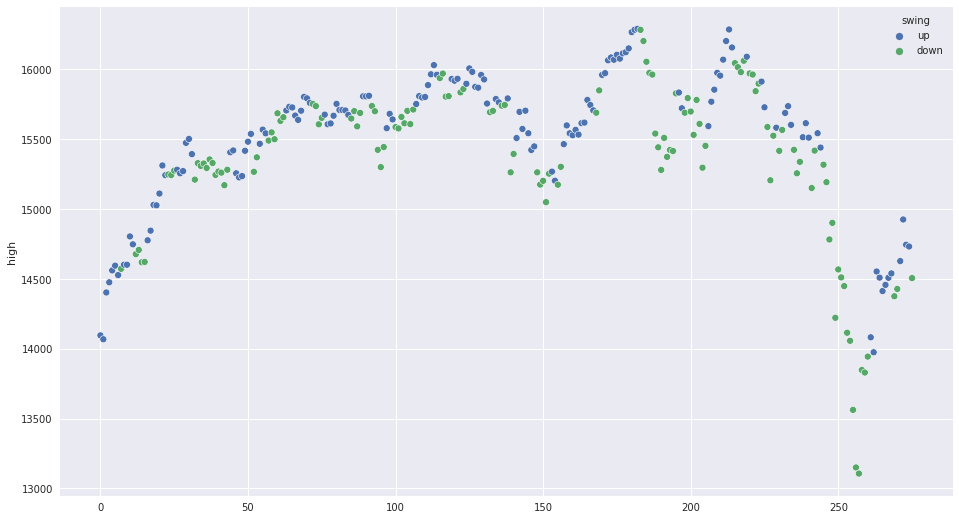

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use("seaborn")
plt.figure(figsize=(16,9))
sns.scatterplot(x=np.arange(len(useful.high)), y=useful.high, hue=useful.swing)

In [10]:
get_lags(useful, "swing", 1)

In [11]:
useful = useful.dropna()
useful = useful.drop("swing", axis=1)

In [12]:
ctab = pd.crosstab(useful.swing_lag_1, useful.daydir)
ctab

daydir,down,up
swing_lag_1,,
down,55,71
up,69,79


In [13]:
from scipy.stats import chi2_contingency
chi2_contingency(ctab)

(0.1373654357122095,
 0.7109143011815987,
 1,
 array([[57.02189781, 68.97810219],
        [66.97810219, 81.02189781]]))

In [14]:
useful = useful[["high", "low", "high_lag_1", "low_lag_1", "daydir"]].copy()

In [15]:
def get_daytype(r):
    if r.high >= r.high_lag_1 and r.low >= r.low_lag_1:
        ret = "up"
    elif r.high >= r.high_lag_1 and r.low <= r.low_lag_1:
        ret = "outside"
    elif r.high <= r.high_lag_1 and r.low >= r.low_lag_1:
        ret =  "inside"
    elif r.high <= r.high_lag_1 and r.low <= r.low_lag_1:
        ret = "down"
    else:
        ret = "wtf"
    return ret

In [16]:
useful["daytype"] =useful.apply(get_daytype, axis=1)
get_lags(useful, "daytype", 30)
useful = useful.dropna()

In [17]:
useful

,high,low,high_lag_1,low_lag_1,daydir,daytype,daytype_lag_1,daytype_lag_2,daytype_lag_3,daytype_lag_4,...,daytype_lag_21,daytype_lag_22,daytype_lag_23,daytype_lag_24,daytype_lag_25,daytype_lag_26,daytype_lag_27,daytype_lag_28,daytype_lag_29,daytype_lag_30
32,15210.69,15071.78,15393.13,15109.54,up,down,down,up,up,up,...,down,up,inside,up,outside,down,up,up,up,up
33,15328.33,15230.20,15210.69,15071.78,up,up,down,down,up,up,...,down,down,up,inside,up,outside,down,up,up,up
34,15309.09,15149.35,15328.33,15230.20,up,down,up,down,down,up,...,outside,down,down,up,inside,up,outside,down,up,up
35,15325.89,15237.02,15309.09,15149.35,down,up,down,up,down,down,...,inside,outside,down,down,up,inside,up,outside,down,up
36,15293.89,15186.76,15325.89,15237.02,down,down,up,down,up,down,...,outside,inside,outside,down,down,up,inside,up,outside,down
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,14627.58,14371.90,14428.03,14247.38,up,up,up,down,outside,up,...,up,down,up,down,down,down,down,up,up,down
272,14925.25,14553.71,14627.58,14371.90,up,up,up,up,down,outside,...,inside,up,down,up,down,down,down,down,up,up
273,14744.72,14555.87,14925.25,14553.71,down,inside,up,up,up,down,...,down,inside,up,down,up,down,down,down,down,up
274,14732.00,14404.03,14744.72,14555.87,down,down,inside,up,up,up,...,down,down,inside,up,down,up,down,down,down,down


In [18]:
for i in range(1, 31):
    ctab = pd.crosstab(useful["daytype_lag_" + str(i)], useful.daydir)
    cont = chi2_contingency(ctab)
    if cont[1] < 0.05:
        print(i, ": ", cont)

7 :  (7.979511088143731, 0.04643705303542002, 3, array([[40.64754098, 46.35245902],
       [15.8852459 , 18.1147541 ],
       [ 8.87704918, 10.12295082],
       [48.59016393, 55.40983607]]))
27 :  (10.02409911721561, 0.018362390991380578, 3, array([[38.77868852, 44.22131148],
       [15.8852459 , 18.1147541 ],
       [10.27868852, 11.72131148],
       [49.05737705, 55.94262295]]))


In [19]:
pd.crosstab(useful["daytype_lag_27"], useful.daydir)

daydir,down,up
daytype_lag_27,,
down,36,47
inside,22,12
outside,5,17
up,51,54


In [20]:

datto = useful.drop(["high", "low", "high_lag_1", "low_lag_1"], axis=1)


In [21]:
X = pd.get_dummies(datto[["daytype_lag_7", "daytype_lag_27"]]).to_numpy()
y = datto.daydir.to_numpy()
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
y = enc.fit_transform(y)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85)

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
tr = DecisionTreeClassifier()
tr.fit(X_train, y_train)

DecisionTreeClassifier()

In [24]:
accuracy_score(tr.predict(X_train), y_train)

0.6328502415458938

In [25]:
accuracy_score(tr.predict(X_test), y_test)

0.6756756756756757

In [26]:
y_train.mean()

0.5169082125603864

In [27]:
y_test.mean()

0.6216216216216216

In [28]:
from sklearn.model_selection import cross_val_score
cross_val_score(tr, X_train, y_train,cv=5).mean()

0.5845528455284553

In [29]:
cross_val_score(tr, X_test, y_test).mean()

0.6821428571428572

In [30]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
accuracy_score(logreg.predict(X_train), y_train)

0.6328502415458938

In [31]:
accuracy_score(logreg.predict(X_test), y_test)

0.6756756756756757

In [32]:
cross_val_score(logreg, X_test, y_test).mean()

0.46428571428571425

In [33]:
cross_val_score(logreg, X_train, y_train).mean()

0.6135888501742162

In [34]:
from xgboost import XGBClassifier

/home/wit/miniconda3/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [35]:
xc = XGBClassifier(use_label_encoder=False)
xc.fit(X_train, y_train)

[15:22:11] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [36]:
accuracy_score(xc.predict(X_train), y_train)

0.6328502415458938

In [37]:
accuracy_score(xc.predict(X_test), y_test)

0.6756756756756757

In [38]:
from sklearn.ensemble import VotingClassifier

In [39]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
accuracy_score(svc.predict(X_train), y_train)

0.6328502415458938

In [40]:
from sklearn.neighbors import KNeighborsClassifier as KNC
knc = KNC(10)

In [41]:
knc.fit(X_train, y_train)
accuracy_score(knc.predict(X_train), y_train)


0.6135265700483091

In [42]:
accuracy_score(knc.predict(X_test), y_test)

0.5675675675675675

In [43]:
from sklearn.naive_bayes import ComplementNB as NB

nb = NB()
nb.fit(X_train, y_train)
accuracy_score(nb.predict(X_train), y_train)

0.6183574879227053

In [44]:
from sklearn.ensemble import RandomForestClassifier as RFC
rfc = RFC()
rfc.fit(X_train, y_train)
accuracy_score(rfc.predict(X_train), y_train)

0.6328502415458938

In [45]:
vc = VotingClassifier([
    ("logreg", logreg),
    ("tr", tr),
    ("xc", xc),
    ("rfc", rfc),
    ("nb", nb),
    ("knc", knc)
])

In [46]:
def get_best_model(models, X_train, y_train, X_test, y_test):
    best_score = 0
    best_model = None
    scores = []
    for m in models:
        m.fit(X_train, y_train)
        score = accuracy_score(m.predict(X_test), y_test)
        scores.append([score, m])
        if score > best_score:
            best_score = score
            best_model = m

    return (best_score, best_model, scores)
        

In [47]:
get_best_model([logreg, tr, xc, vc, rfc, nb, knc],X_train, y_train, X_test, y_test)

[15:22:12] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[15:22:13] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


(0.6756756756756757,
 LogisticRegression(),
 [[0.6756756756756757, LogisticRegression()],
  [0.6756756756756757, DecisionTreeClassifier()],
  [0.6756756756756757,
   XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                 colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
                 gamma=0, gpu_id=-1, importance_type=None,
                 interaction_constraints='', learning_rate=0.300000012,
                 max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
                 monotone_constraints='()', n_estimators=100, n_jobs=8,
                 num_parallel_tree=1, predictor='auto', random_state=0,
                 reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
                 tree_method='exact', use_label_encoder=False,
                 validate_parameters=1, verbosity=None)],
  [0.6756756756756757,
   VotingClassifier(estimators=[('logreg', LogisticRegression()),
                                ('tr', 

In [48]:
logreg.fit(X_train, y_train)
accuracy_score(logreg.predict(X_test), y_test)

0.6756756756756757

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 1]], dtype=uint8)

,daydir,daytype,daytype_lag_1,daytype_lag_2,daytype_lag_3,daytype_lag_4,daytype_lag_5,daytype_lag_6,daytype_lag_7,daytype_lag_8,...,daytype_lag_21,daytype_lag_22,daytype_lag_23,daytype_lag_24,daytype_lag_25,daytype_lag_26,daytype_lag_27,daytype_lag_28,daytype_lag_29,daytype_lag_30
32,up,down,down,up,up,up,inside,outside,up,inside,...,down,up,inside,up,outside,down,up,up,up,up
33,up,up,down,down,up,up,up,inside,outside,up,...,down,down,up,inside,up,outside,down,up,up,up
34,up,down,up,down,down,up,up,up,inside,outside,...,outside,down,down,up,inside,up,outside,down,up,up
35,down,up,down,up,down,down,up,up,up,inside,...,inside,outside,down,down,up,inside,up,outside,down,up
36,down,down,up,down,up,down,down,up,up,up,...,outside,inside,outside,down,down,up,inside,up,outside,down
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,up,up,up,down,outside,up,up,down,inside,up,...,up,down,up,down,down,down,down,up,up,down
272,up,up,up,up,down,outside,up,up,down,inside,...,inside,up,down,up,down,down,down,down,up,up
273,down,inside,up,up,up,down,outside,up,up,down,...,down,inside,up,down,up,down,down,down,down,up
274,down,down,inside,up,up,up,down,outside,up,up,...,down,down,inside,up,down,up,down,down,down,down


In [51]:
X

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 1]], dtype=uint8)